### Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# creating path
path = r'C:\Users\jnyam\Documents\Global Super Store'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Global_store_sales.csv'), index_col = False)

### Cleaning data

In [5]:
df.head()

,Unnamed: 0,row_id,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,total_sales
0,0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,16167.550
1,1,26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,33384.555
2,2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,46576.539
3,3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,14462.550
4,4,47221,SG-2013-4320,5/11/2013,6/11/2013,Same Day,RH-9495,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,22663.680


In [6]:
df.dtypes

Unnamed: 0          int64
row_id              int64
order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_id        object
segment            object
city               object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales             float64
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
total_sales       float64
dtype: object

In [7]:
df_numerical = df.drop(columns = ['Unnamed: 0', 'row_id', 'order_id', 'category', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'segment', 'city', 'state', 'country', 'market', 'region', 'product_id', 'sub_category', 'product_name', 'order_priority'], axis=1, inplace=True)


In [8]:
df.head()

,sales,quantity,discount,profit,shipping_cost,total_sales
0,2309.650,7,0.0,762.1845,933.57,16167.550
1,3709.395,9,0.1,-288.7650,923.63,33384.555
2,5175.171,9,0.1,919.9710,915.49,46576.539
3,2892.510,5,0.1,-96.5400,910.16,14462.550
4,2832.960,8,0.0,311.5200,903.04,22663.680


### 2. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-625123461285.2007,
 -275305541622.20154,
 -155378117663.22815,
 -94134873348.99829,
 -66609623193.94857,
 -47827567158.67319,
 -36734923444.09303,
 -29160484934.767254,
 -23321399462.322544]

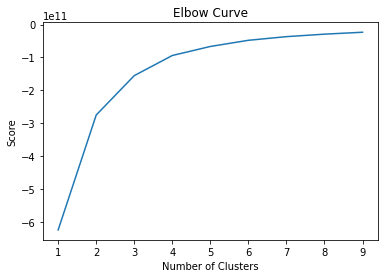

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a large jump from two to three and four on the x axis. The optimal count for my clusters is four. 

### k-means clustering

In [12]:
# create the k-means object
kmeans = KMeans(n_clusters = 4, n_jobs = -1)

In [13]:
kmeans.fit(df)

C:\Users\jnyam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [14]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\jnyam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [15]:
df.head()

,sales,quantity,discount,profit,shipping_cost,total_sales,clusters
0,2309.650,7,0.0,762.1845,933.57,16167.550,1
1,3709.395,9,0.1,-288.7650,923.63,33384.555,1
2,5175.171,9,0.1,919.9710,915.49,46576.539,3
3,2892.510,5,0.1,-96.5400,910.16,14462.550,1
4,2832.960,8,0.0,311.5200,903.04,22663.680,1


In [16]:
df['clusters'].value_counts()

0    46925
2     3671
1      627
3       67
Name: clusters, dtype: int64

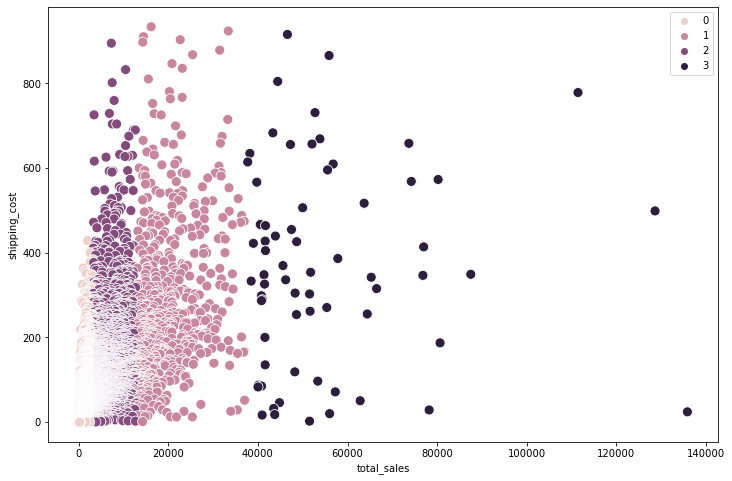

In [17]:
# Plot the clusters for the "total_sales" and "shipping_cost" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_sales'], y=df['shipping_cost'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total_sales') # Label x-axis.
plt.ylabel('shipping_cost') # Label y-axis.
plt.show()


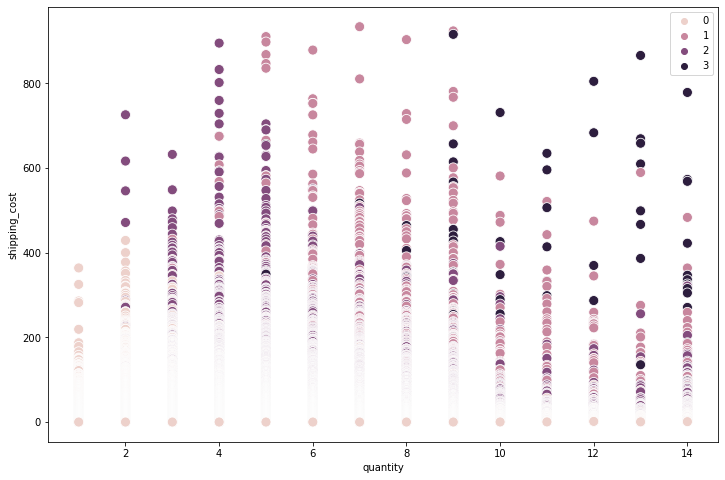

In [18]:
# Plot the clusters for the "quantity " and "shipping_cost" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['quantity'], y=df['shipping_cost'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('quantity') 
plt.ylabel('shipping_cost') 
plt.show()

In [19]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [20]:
df.groupby('cluster').agg({'discount':['mean', 'median'], 
                         'profit':['mean', 'median'], 
                         'shipping_cost':['mean', 'median'],
                          'total_sales':['mean', 'median']})

discount              profit          shipping_cost          \
                 mean median         mean   median          mean  median   
cluster                                                                    
dark purple  0.086418    0.0  1213.682376  919.971    367.976866  348.08   
light pink   0.146279    0.0    13.688103    8.098     15.581910    6.56   
pink         0.089726    0.0   411.336426  401.814    269.897352  230.04   
purple       0.109931    0.0   132.366761  137.040    116.523963   87.66   

              total_sales            
                     mean    median  
cluster                              
dark purple  55067.534119  48599.19  
light pink     494.826048    199.99  
pink         19701.038146  17907.20  
purple        6145.324023   5380.56

The insights can help me to explore the relationship of the variables and see what kind of new patterns and insights I can glean. For example, It shows that the shipping cost is highest up to 20000 sales. 